<a href="https://colab.research.google.com/github/AenimaLabs/CienciaDatos0067/blob/main/Evaluaci%C3%B3nFinalM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Configuración básica de visualización
plt.style.use('default')
sns.set_palette("Set2")

In [19]:
# Cargar el dataset
ruta = '/content/drive/MyDrive/Evaluaciones_0067/olimpicos.csv'
df = pd.read_csv(ruta)

# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
display(df.head())

print("\nDatos nulos")
print(df.isnull().sum())

# Información general del DataFrame
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())



Primeras 5 filas del dataset:


,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania



Datos nulos
Atleta                      0
Edad                        0
Altura_cm                   0
Peso_kg                     0
Deporte                     0
Entrenamientos_Semanales    0
Medallas_Totales            0
Pais                        0
dtype: int64

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes
None

Estadís

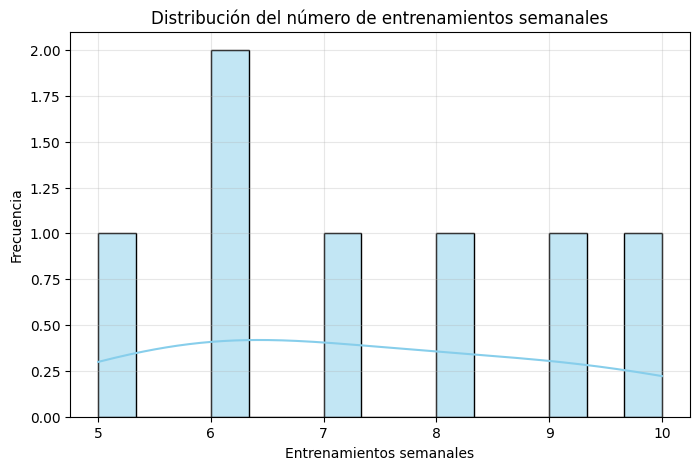

In [6]:
# Histograma del número de entrenamientos semanales
plt.figure(figsize=(8, 5))
sns.histplot(df['Entrenamientos_Semanales'], bins=15, kde=True, color='skyblue')
plt.title('Distribución del número de entrenamientos semanales')
plt.xlabel('Entrenamientos semanales')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

## Estadística descriptiva

In [13]:
# Determinar el tipo de variable de cada columna
print("Tipos de variables por columna:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: Categórica")
    elif df[col].dtype in ['int64']:
            print(f"{col}: Cuantitativa discreta")
    elif df[col].dtype in ['float64']:
        print(f"{col}: Cuantitativa continua")
    else:
        print(f"{col}: Otro tipo")



Tipos de variables por columna:
Atleta: Categórica
Edad: Cuantitativa discreta
Altura_cm: Cuantitativa discreta
Peso_kg: Cuantitativa discreta
Deporte: Categórica
Entrenamientos_Semanales: Cuantitativa discreta
Medallas_Totales: Cuantitativa discreta
Pais: Categórica



Medallas totales - Media: 8.57, Mediana: 7.0, Moda: 3
Desviación estándar de la altura: 18.72 cm


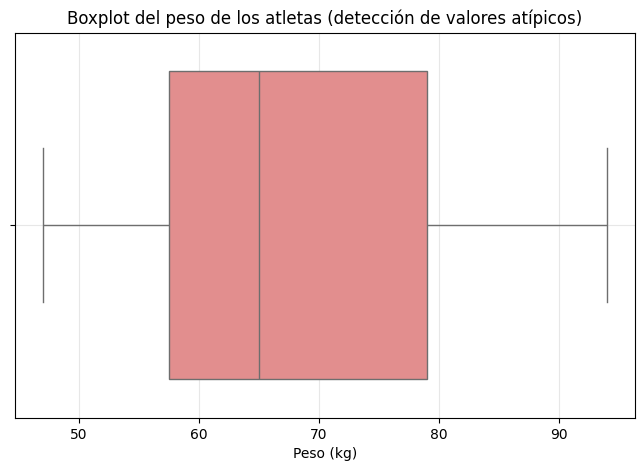

In [11]:
# Media, mediana y moda de medallas obtenidas
medallas = df['Medallas_Totales']

media = medallas.mean()
mediana = medallas.median()
moda = medallas.mode()[0] if not medallas.mode().empty else np.nan

print(f"\nMedallas totales - Media: {media:.2f}, Mediana: {mediana}, Moda: {moda}")

# Desviación estándar de la altura
desv_altura = df['Altura_cm'].std()
print(f"Desviación estándar de la altura: {desv_altura:.2f} cm")

# Boxplot para identificar valores atípicos en peso
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Peso_kg'], color='lightcoral')
plt.title('Boxplot del peso de los atletas (detección de valores atípicos)')
plt.xlabel('Peso (kg)')
plt.grid(True, alpha=0.3)
plt.show()